In [1]:
# https://forum.generic-mapping-tools.org/t/colab-example-on-github-try-pygmt-online-not-working-any-more/1790/11
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pygmt

✨🍰✨ Everything looks OK!

Looking for: ['pygmt']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   2%
conda-forge/noarch     4%[+] 0.3s
conda-forge/linux-64   8%
conda-forge/noarch    19%[+] 0.4s
conda-forge/linux-64   8%
conda-forge/noarch    32%[+] 0.5s
conda-forge/linux-64  13%
conda-forge/noarch    45%[+] 0.6s
conda-forge/linux-64  19%
conda-forge/noarch    57%[+] 0.7s
conda-forge/linux-64  24%
conda-forge/noarch    57%[+] 0.8s
conda-forge/linux-64  29%
conda-forge/noarch    70%[+] 0.9s
conda-forge/linux-64  29%
conda-forge/noarch    83%[+] 1.0s
conda-forge/linux-64  29%
conda-forge/noarch    83%[+] 1.1s
conda-forge/linux-64  34%
conda-forge/noarch    83%[+] 1.2s
conda-forge/linux-64  34%
conda-forge/noarch    83%[+] 1.3s
conda-forge/linux-64  34%
conda-forge/noarch    96%conda-forge/noarch                                
[+] 1.4s
conda-forge/linux-64  40%[+] 1.5s
conda-forge/linu

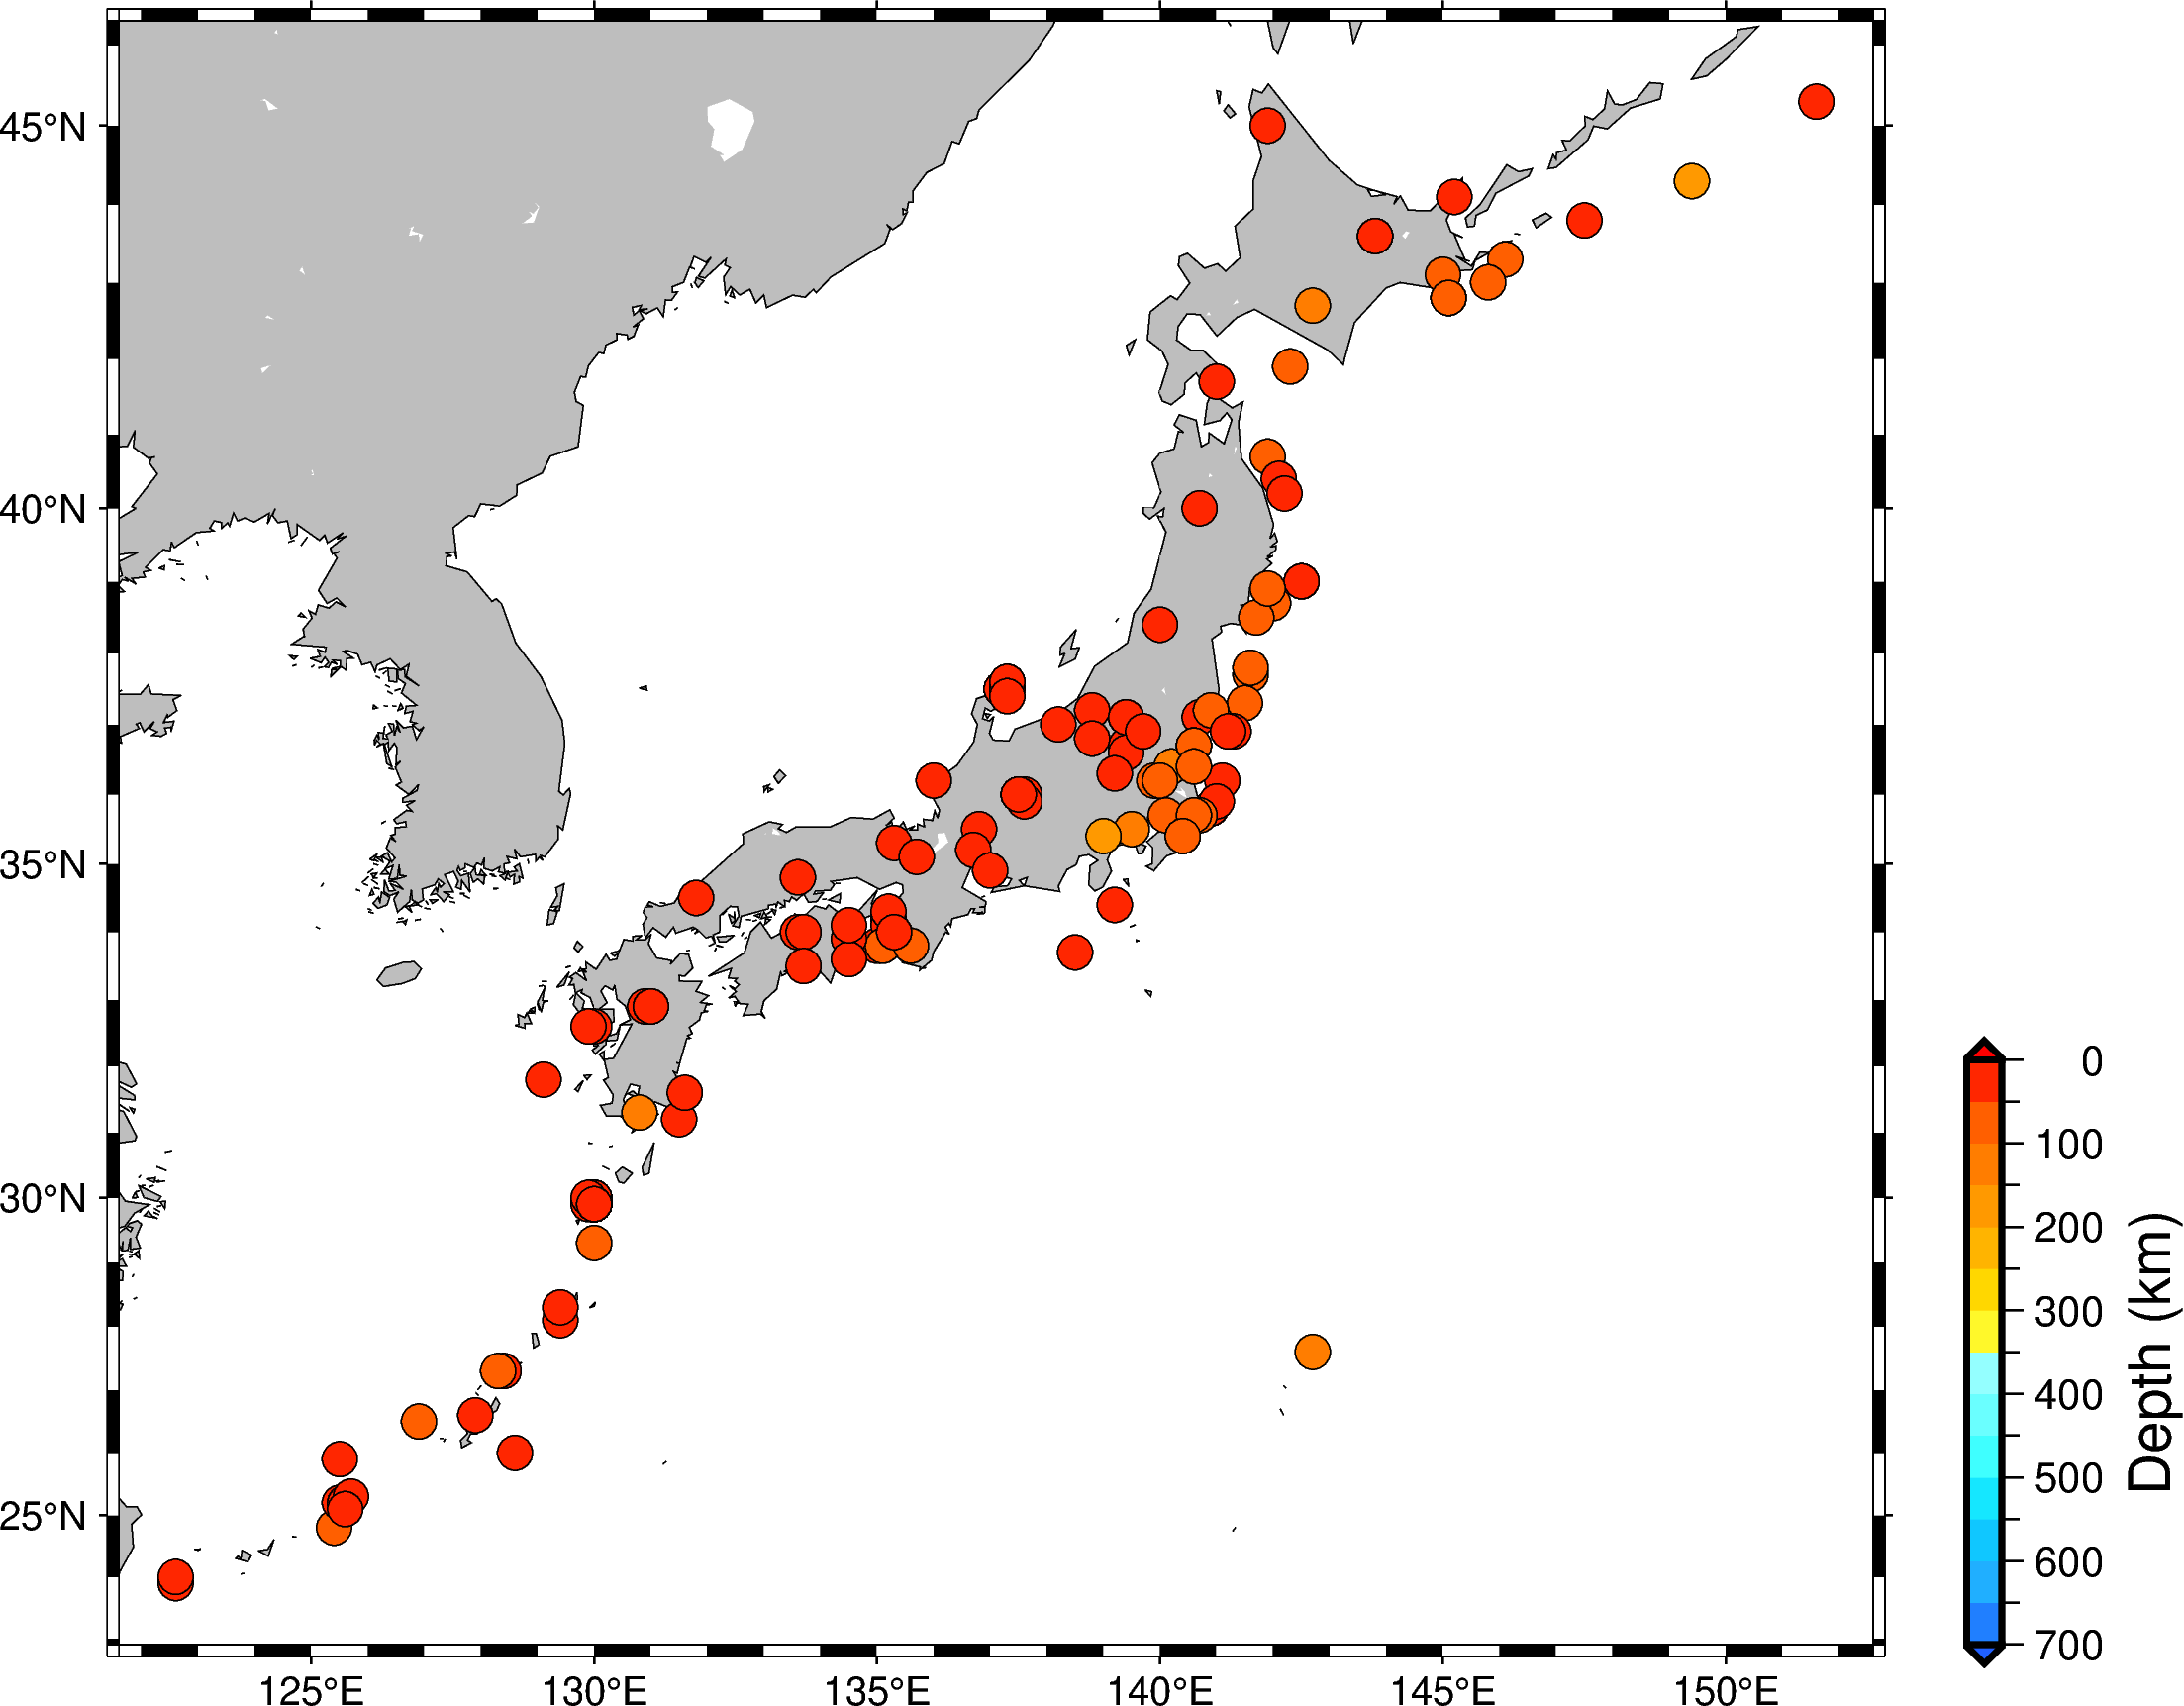

In [2]:
import re
import requests
import pygmt

def fetch_earthquake_data(url):
    response = requests.get(url)
    data = response.json()
    return [quake for quake in data if quake.get('ttl') == '震源・震度情報']

def parse_coordinates(coord_string):
    match = re.match(r'([+|-]\d{2}.\d+)([+|-]\d{3}.\d+)(.*)/', coord_string)
    return tuple(map(float, match.groups()))

url = 'https://www.jma.go.jp/bosai/quake/data/list.json'
quakes = fetch_earthquake_data(url)

magnitudes = [quake['mag'] for quake in quakes]
coordinates = [parse_coordinates(quake['cod']) for quake in quakes]

latitudes, longitudes, depths = zip(*coordinates)
depths = [-0.001 * depth for depth in depths]

region = [
    min(longitudes) - 1,
    max(longitudes) + 1,
    min(latitudes) - 1,
    max(latitudes) + 1,
]

fig = pygmt.Figure()
fig.coast(
    projection='M15c',
    region=region,
    resolution='l',
    land='gray',
    shorelines='1/thinnest',
    frame='af'
)
pygmt.makecpt(
    cmap='no_green',
    series='0/700/50',
    reverse=True
)
fig.plot(
    x=longitudes,
    y=latitudes,
    style='c0.3',
    pen='thinnest',
    cmap=True,
    fill=depths
)
fig.colorbar(
    position='JBR+jBL+o0.8/0+w-5/0.3+e',
    frame='a100f50+l"Depth (km)"'
)
fig.show()